# Original Lab by: Daniil Iagubkov IKBFU 2023.

In [1]:
# 2 Реализовать чтение данных из файла student_scores.csv
import pandas as pd
dataframe = pd.read_csv('student_scores.csv')
dataframe.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
# 3 Вывести статистическую информацию о используемых данных (количество, min, max, среднее) по каждому из столбцов
print(f'Count of rows: {dataframe.shape[0]}', end='\n\n')
print(f'Min values at every column:\n{dataframe.min()}',end='\n\n')
print(f'Max values at every column:\n{dataframe.max()}', end='\n\n')
print(f'Mean values at every column:\n{dataframe.mean()}')

Count of rows: 25

Min values at every column:
Hours      1.1
Scores    17.0
dtype: float64

Max values at every column:
Hours      9.2
Scores    95.0
dtype: float64

Mean values at every column:
Hours      5.012
Scores    51.480
dtype: float64


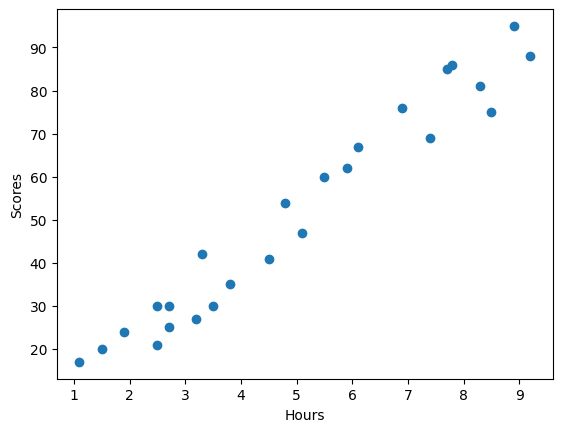

In [3]:
# 4 Используя библиотеку Matplotlib вывести изображение исходных точек
from matplotlib import pyplot as plt
#  plt.scatter - график точек
plt.scatter(dataframe['Hours'],
            dataframe['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [4]:
# 5 Реализовать алгоритм метода наименьших квадратов и вычислить параметры регрессионной прямой.
import numpy as np
hours = dataframe['Hours'].to_numpy()
scores = dataframe['Scores'].to_numpy()

hours_mean = np.mean(hours)
scores_mean = np.mean(scores)

numerator = 0
denominator = 0

for i in range(len(hours)):
    numerator += (hours[i] - hours_mean) * (scores[i] - scores_mean)
    denominator += (hours[i] - hours_mean) ** 2

b1 = numerator / denominator
b0 = scores_mean - (b1 * hours_mean)
print(f'Coefficients: b0 = {b0:.04f}, b1 = {b1:.04f}')



Coefficients: b0 = 2.4837, b1 = 9.7758


### Регрессию выражают с помощью двух уравнений регрессии, которые в самом простом случае выглядят, как уравнения прямой, а именно так:

Y = a0+a1*X (1) </br>
X = b0+b1*Y (2) </br>

В уравнении (2)  X - зависимая переменная, a Y — независимая переменная, b0 - свободный член, а b1 — коэффициент регрессии, или угловой коэффициент, определяющий наклон линии регрессии по отношению к осям координат.
</br>

коэффициент b1 в уравнении (2) можно подсчитать по формуле (4) </br>
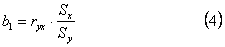 </br>
где rxy  —  коэффициент корреляции между переменными  X и Y;

В том случае, если неизвестен коэффициент корреляции, коэффициенты регрессии можно вычислить по следующим формулам

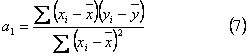
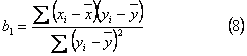


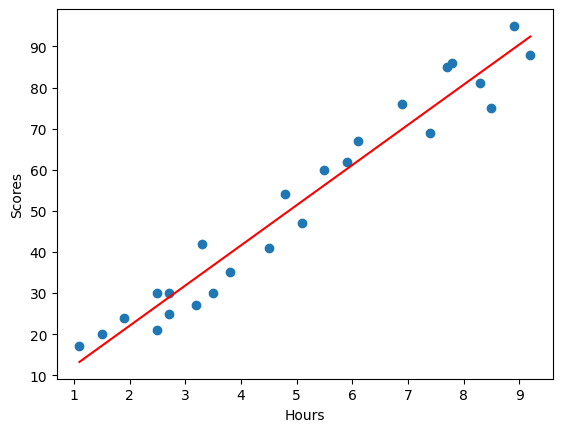

In [5]:
# 6 Используя библиотеку Matplotlib и полученное в п.3 изображение отрисовать на изображении другим цветом полученную прямую
scores_pred = b0 + b1 * hours
plt.scatter(hours, scores)
plt.plot([min(hours), max(hours)],
         [min(scores_pred), max(scores_pred)],
         color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

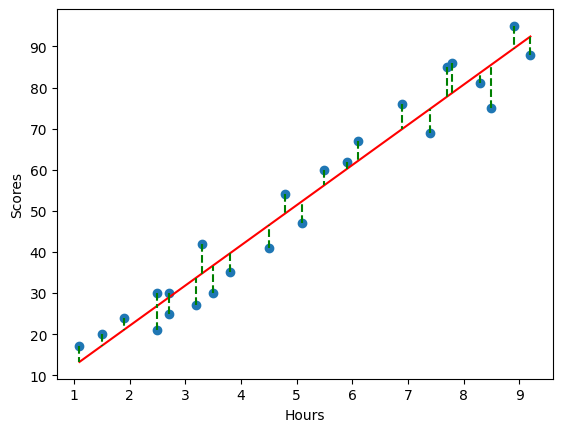

In [6]:
# 7 Используя полученное в п.5 изображение, отрисовать и заштриховать квадраты ошибок
plt.scatter(hours, scores)
plt.plot([min(hours), max(hours)],
         [min(scores_pred), max(scores_pred)],
         color='red')

plt.xlabel('Hours')
plt.ylabel('Scores')

for item in range(len(hours)):
    plt.plot([hours[item], hours[item]],
             [scores[item], scores_pred[item]],
             color='green',
             linestyle='dashed')
plt.show()
